In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving saham.txt to saham (2).txt


In [ ]:
with open('saham (2).txt','r') as saham:
  print(saham.readlines())

['Saham (stock) merupakan salah satu instrumen pasar keuangan yang paling popular. Menerbitkan saham merupakan salah satu pilihan perusahaan ketika memutuskan untuk pendanaan perusahaan. Pada sisi yang lain, saham merupakan instrument investasi yang banyak dipilih para investor karena saham mampu memberikan tingkat keuntungan yang menarik.\n', '\n', 'Saham dapat didefinisikan sebagai tanda penyertaan modal seseorang atau pihak (badan usaha) dalam suatu perusahaan atau perseroan terbatas. Dengan menyertakan modal tersebut, maka pihak tersebut memiliki klaim atas pendapatan perusahaan, klaim atas asset perusahaan, dan berhak hadir dalam Rapat Umum Pemegang Saham (RUPS)']


In [ ]:
with open('saham (2).txt','a') as saham: 
  saham.write('\nI will become Succesful Data Science')
  #'a' untuk append = menambahkan text
  #'w' untuk write  = menimpa data dengan text baru

In [ ]:
with open('saham (2).txt','r') as saham:
  for line in saham:
    print(line, end='')

Saham (stock) merupakan salah satu instrumen pasar keuangan yang paling popular. Menerbitkan saham merupakan salah satu pilihan perusahaan ketika memutuskan untuk pendanaan perusahaan. Pada sisi yang lain, saham merupakan instrument investasi yang banyak dipilih para investor karena saham mampu memberikan tingkat keuntungan yang menarik.

Saham dapat didefinisikan sebagai tanda penyertaan modal seseorang atau pihak (badan usaha) dalam suatu perusahaan atau perseroan terbatas. Dengan menyertakan modal tersebut, maka pihak tersebut memiliki klaim atas pendapatan perusahaan, klaim atas asset perusahaan, dan berhak hadir dalam Rapat Umum Pemegang Saham (RUPS)
I will become Succesful Data Science

In [2]:
!pip install psycopg2

In [3]:
import psycopg2

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [4]:
conn = psycopg2.connect(host="digitalskoladb.c04me33o8tni.ap-southeast-1.rds.amazonaws.com",
                         database ="sandbox",
                         user="ds11_1",
                         password="ds11_1")

In [5]:
cur = conn.cursor() #disimpan di dalam cursor, dan ini harus!

In [ ]:
sql = "select * from batch_11.cb_stations"
cur.execute(sql)

In [ ]:
cur.fetchone() #bentukan asli datanya

In [ ]:
sql = "select * from batch_11.cb_stations"
data= pd.read_sql_query(sql, conn)
data.head()

,station_id,name,short_name,latitude,longitude,region_id,rental_methods,capacity,eightd_has_key_dispenser,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,is_installed,is_renting,is_returning,eightd_has_available_keys,last_reported
0,128,MacDougal St & Prince St,5687.04,40.727104,-74.002970,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01
1,224,Spruce St & Nassau St,5137.10,40.711464,-74.005520,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,True,True,True,False,1970-01-01
2,229,Great Jones St,5636.11,40.727436,-73.993790,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01
3,410,Suffolk St & Stanton St,5445.02,40.720665,-73.985176,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01
4,434,9 Ave & W 18 St,6190.08,40.743176,-74.003660,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01


In [ ]:
sql = """
select sum(num_bikes_available)
from
  (select*from batch_11.cb_stations
  where lower(name) like '%macdougal%') as br
 """
data= pd.read_sql_query(sql, conn)
data

,sum
0,28


In [ ]:
sql = """

with tabs as
 (select*
 from batch_11.cb_trips
 )
    select*from tabs
 """
data_trips= pd.read_sql_query(sql, conn)
data_trips.head()

In [9]:
sql ="""
with tabs as(
  select t.tripduration, s.name, t.starttime
  from batch_11.cb_stations as s
  join batch_11.cb_trips as t 
  on s.station_id = t.end_station_id
)
select name, sum(tripduration) from tabs
where name like '%Clermont%'
group by name
having sum(tripduration) < 3000000
"""

data2 = pd.read_sql_query(sql, conn)
data2.head()

,name,sum
0,Clermont Ave & Lafayette Ave,760813
1,Clermont Ave & Park Ave,332556
2,Fulton St & Clermont Ave,860286


In [ ]:
sql = """
with tabs as (
  select*from batch_11.cb_trips
  where gender = 0 and tripduration = 634)

  select*from tabs"""
data_trips= pd.read_sql_query(sql, conn)
data_trips.head()

station = data_trips['start_station_name'].value_counts()
df_station = pd.DataFrame(station)
df_station.reset_index(inplace=True)
df_station.rename(columns={'index':'start_station', 'start_station_name':'total'}, inplace=True)
df_station

,start_station,total
0,8 Ave & W 31 St,4
1,West Thames St,3
2,E 40 St & 5 Ave,3
3,St Marks Pl & 2 Ave,3
4,Henry St & Atlantic Ave,3
...,...,...
83,Cliff St & Fulton St,1
84,Greenwich Ave & Charles St,1
85,Lawrence St & Willoughby St,1
86,E 16 St & Irving Pl,1


In [15]:
sql = """
with tabs as(
  select*from batch_11.cb_trips
  where lower(end_station_name) like '%broadway%'
  and tripduration <=500 
) select*from tabs 

"""
data3 = pd.read_sql_query(sql, conn)
data3.head()

,tripduration,starttime,stoptime,start station id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,428,2013-07-11 20:08:42,2013-07-11 20:15:50,476,E 31 St & 3 Ave,40.743943,-73.979661,402,Broadway & E 22 St,40.740343,-73.989551,19140,Subscriber,1985,1
1,303,2013-07-11 20:16:39,2013-07-11 20:21:42,504,1 Ave & E 15 St,40.732219,-73.981656,285,Broadway & E 14 St,40.734546,-73.990741,18663,Subscriber,1989,2
2,463,2013-07-11 20:17:11,2013-07-11 20:24:54,326,E 11 St & 1 Ave,40.729538,-73.984267,497,E 17 St & Broadway,40.737050,-73.990093,18405,Subscriber,1985,1
3,333,2013-07-11 20:17:22,2013-07-11 20:22:55,304,Broadway & Battery Pl,40.704633,-74.013617,195,Liberty St & Broadway,40.709056,-74.010434,15871,Subscriber,1994,1
4,197,2013-07-11 20:20:49,2013-07-11 20:24:06,173,Broadway & W 49 St,40.760647,-73.984427,173,Broadway & W 49 St,40.760647,-73.984427,16158,Subscriber,1983,2


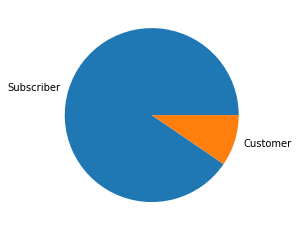

In [17]:
piechart = data3['usertype'].value_counts().rename_axis('usertype').reset_index(name='counts')
plt.pie(piechart['counts'],labels=piechart['usertype'])
plt.show()